In [ ]:
!pip install mastml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of globus-compute-sdk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of globus-compute-sdk to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of funcx to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of funcx to determine which version is compatible

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os                        # OS stands for Operating System and provides ways for python to interact with files or directories
from collections import Counter  # Collections is a package for handling data
from pprint import pprint

import pandas as pd              # Pandas is a data analysis library which we'll primarily use to handle our dataset
import numpy as np               # Numpy is a package for scientific computing. We'll use it for some of it's math functions
import matplotlib                # Matplotlib is the plotting package that we'll use throughout the lab
import matplotlib.pyplot as plt
import seaborn as sns            # Seaborn is a Python data visualization library based on matplotlib
import sklearn                   # Scikit-learn is a machine learning package, providing the backbone for the work we'll perform
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate,GridSearchCV,ParameterGrid
from sklearn.model_selection import KFold,RepeatedKFold
from mastml.mastml import Mastml
# MastML and other imports
from mastml.mastml import Mastml
from mastml.models import SklearnModel
from mastml.preprocessing import SklearnPreprocessor
from mastml.feature_selectors import SklearnFeatureSelector, EnsembleModelFeatureSelector, ShapFeatureSelector
from mastml.feature_generators import OneHotGroupGenerator
from mastml.data_splitters import SklearnDataSplitter
import numpy as np
from copy import copy
import mastml
import os
try:
    data_path = os.path.join(mastml.__path__._path[0], 'data')
except:
    data_path = os.path.join(mastml.__path__[0], 'data')

scikit-lego is an optional dependency, enabling use of the LowessRegression model. If you want to use this model, do "pip install scikit-lego"
linear-tree is an optional dependency, enabling use of Linear tree, forest, and boosting models. If you want to use this model, do "pip install linear-tree"
gplearn is an optional dependency, enabling the use of genetic programming SymbolicRegressor model. If you want to use this model, do "pip install gplearn"
CBFV is an optional dependency. To install CBFV, do pip install cbfv
DeepChem is an optional dependency used to generate molecular descriptors from RDKit. To install Deepchem, do pip install deepchem


ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


In [ ]:
SAVEPATH = 'drive/MyDrive/Food Pantry Research/v4_RF_results'

mastml_instance = Mastml(savepath=SAVEPATH)
savepath = mastml_instance.get_savepath

In [ ]:
from pathlib import Path
file_path = Path('/content/drive/MyDrive/Food Pantry Research')
path = file_path
df = pd.read_csv(os.path.join(path,"skunkworks_data_v4.csv"))
df

,Date,Amount,Type,Fund,Campaign,Appeal,Zip,Account Number,Quarter,DayOfWeek,Season
0,2024-09-25,300.00,Donation,Unrestricted,Support The River,Individual Online,53704.0,2574,3,2,4
1,2024-09-25,25.81,Recurring Donation Payment,Unrestricted,Support The River,Individual Online,53590.0,2692,3,2,4
2,2024-09-24,100.00,Donation,Unrestricted,Support The River,Individual Multi Channel,53703.0,310,3,1,4
3,2024-09-24,123.87,Donation,Unrestricted,Support The River,Individual Multi Channel,53705.0,309,3,1,4
4,2024-09-24,10.00,Donation,Unrestricted,Support The River,Individual Multi Channel,53705.0,312,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...
9263,2023-01-01,25.00,Recurring Donation Payment,Unrestricted,Support The River,Individual Online,53704.0,8,1,6,1
9264,2023-01-01,108.15,Donation,Unrestricted,Year-End 2022,Year-End Appeal Mailing 2022,53590.0,244,1,6,1
9265,2023-01-01,103.00,Donation,Unrestricted,Support The River,Individual Online,53718.0,84,1,6,1
9266,2023-01-01,103.00,Donation,Unrestricted,Support The River,Individual Online,53711.0,4540,1,6,1


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df = df.drop(columns=['Date', 'Account Number'])  # Drop date and account number columns
df

,Amount,Type,Fund,Campaign,Appeal,Zip,Quarter,DayOfWeek,Season,Month,Day,Year
0,300.00,Donation,Unrestricted,Support The River,Individual Online,53704.0,3,2,4,9,25,2024
1,25.81,Recurring Donation Payment,Unrestricted,Support The River,Individual Online,53590.0,3,2,4,9,25,2024
2,100.00,Donation,Unrestricted,Support The River,Individual Multi Channel,53703.0,3,1,4,9,24,2024
3,123.87,Donation,Unrestricted,Support The River,Individual Multi Channel,53705.0,3,1,4,9,24,2024
4,10.00,Donation,Unrestricted,Support The River,Individual Multi Channel,53705.0,3,1,4,9,24,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
9263,25.00,Recurring Donation Payment,Unrestricted,Support The River,Individual Online,53704.0,1,6,1,1,1,2023
9264,108.15,Donation,Unrestricted,Year-End 2022,Year-End Appeal Mailing 2022,53590.0,1,6,1,1,1,2023
9265,103.00,Donation,Unrestricted,Support The River,Individual Online,53718.0,1,6,1,1,1,2023
9266,103.00,Donation,Unrestricted,Support The River,Individual Online,53711.0,1,6,1,1,1,2023


In [ ]:
# One-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Type', 'Fund', 'Campaign', 'Appeal']

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_features])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))
one_hot_df

,Type_Donation,Type_Pledge Payment,Type_Recurring Donation Payment,Type_Recurring Donation Schedule,Type_Soft Credit,Fund_Cap Camp Operational Res,Fund_Cap Camp Unrestricted,Fund_Munch,Fund_Programs/Operations,Fund_Restricted Misc,...,Appeal_Foundation Online,Appeal_Individual Event,Appeal_Individual Mailing,Appeal_Individual Multi Channel,Appeal_Individual Online,Appeal_Individual Payroll,Appeal_Service Org Event,Appeal_Service Org Mailing,Appeal_Service Org Multi Channel,Appeal_Year-End Appeal Mailing 2022
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9263,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9265,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9266,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
featurized_df = pd.concat([df.drop(columns=categorical_features), one_hot_df], axis=1)
featurized_df

,Amount,Zip,Quarter,DayOfWeek,Season,Month,Day,Year,Type_Donation,Type_Pledge Payment,...,Appeal_Foundation Online,Appeal_Individual Event,Appeal_Individual Mailing,Appeal_Individual Multi Channel,Appeal_Individual Online,Appeal_Individual Payroll,Appeal_Service Org Event,Appeal_Service Org Mailing,Appeal_Service Org Multi Channel,Appeal_Year-End Appeal Mailing 2022
0,300.00,53704.0,3,2,4,9,25,2024,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,25.81,53590.0,3,2,4,9,25,2024,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,100.00,53703.0,3,1,4,9,24,2024,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,123.87,53705.0,3,1,4,9,24,2024,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.00,53705.0,3,1,4,9,24,2024,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9263,25.00,53704.0,1,6,1,1,1,2023,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9264,108.15,53590.0,1,6,1,1,1,2023,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9265,103.00,53718.0,1,6,1,1,1,2023,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9266,103.00,53711.0,1,6,1,1,1,2023,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Separate features and target variable
X = featurized_df.drop(columns=['Amount'])  # Features
y = featurized_df['Amount']  # Target variable
X

,Zip,Quarter,DayOfWeek,Season,Month,Day,Year,Type_Donation,Type_Pledge Payment,Type_Recurring Donation Payment,...,Appeal_Foundation Online,Appeal_Individual Event,Appeal_Individual Mailing,Appeal_Individual Multi Channel,Appeal_Individual Online,Appeal_Individual Payroll,Appeal_Service Org Event,Appeal_Service Org Mailing,Appeal_Service Org Multi Channel,Appeal_Year-End Appeal Mailing 2022
0,53704.0,3,2,4,9,25,2024,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,53590.0,3,2,4,9,25,2024,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,53703.0,3,1,4,9,24,2024,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53705.0,3,1,4,9,24,2024,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53705.0,3,1,4,9,24,2024,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9263,53704.0,1,6,1,1,1,2023,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9264,53590.0,1,6,1,1,1,2023,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9265,53718.0,1,6,1,1,1,2023,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9266,53711.0,1,6,1,1,1,2023,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

,Amount
0,300.00
1,25.81
2,100.00
3,123.87
4,10.00
...,...
9263,25.00
9264,108.15
9265,103.00
9266,103.00


Running splits: 100%|██████████| 5/5 [12:45<00:00, 153.08s/it]


Running splits: 100%|██████████| 5/5 [00:13<00:00,  2.71s/it]


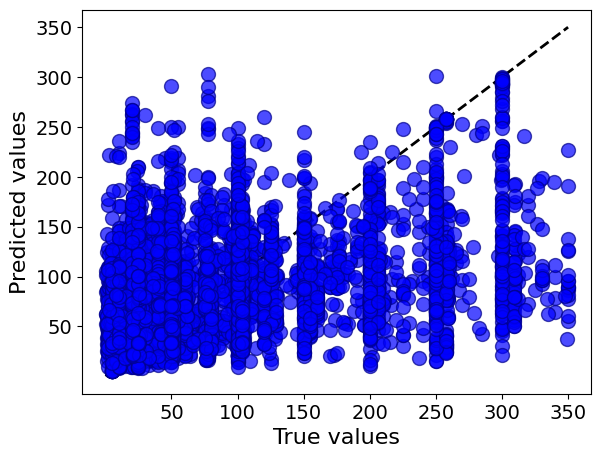

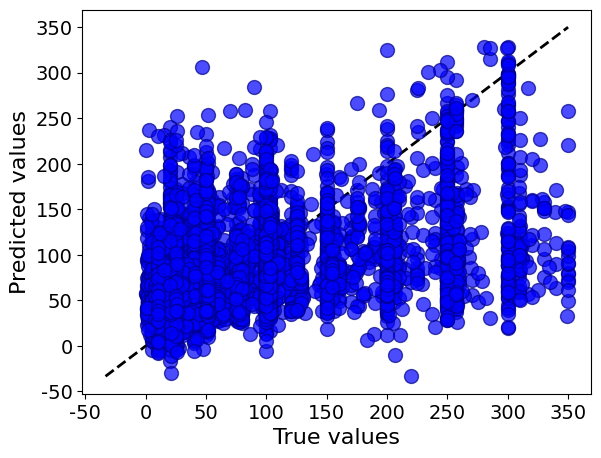

In [ ]:
model_xgb = SklearnModel(model='XGBoostRegressor', n_estimators=150)
model_rf = SklearnModel(model='RandomForestRegressor', n_estimators=150)
models = [model_rf, model_xgb]


preprocessor = SklearnPreprocessor(preprocessor='StandardScaler', as_frame=True)

baseline_tests = ["test_mean", "test_permuted"]
# Run the evaluation for both models
metrics = ['r2_score', 'mean_absolute_error', 'root_mean_squared_error', 'rmse_over_stdev']
# Set up 5-fold cross-validation
splitter = SklearnDataSplitter(splitter='RepeatedKFold', n_repeats=1, n_splits=5)
splitter.evaluate(X=X,
                  y=y,
                  models=models,
                  preprocessor=preprocessor,
                  metrics=metrics,
                  plots=['Scatter', 'Histogram'],
                  savepath=savepath,
                  baseline_test=baseline_tests,
                  verbosity=1)